Importing all the required libraries 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import datetime
import plotly.express as px
from IPython.display import Image
from statistics import mode

Reading the long format super covid-19 dataset. Actually we converted the wide format dateframe generated in stage-1 to long format as it will be easy to perform operations(to convert into weekly) when dates are in rows. Also the world covid-19 dataset(owid dataset) has dates in rows. In order to compare the usa data with other countries we converted the wide format dataset to long format.

In [2]:
super_covid19_long = pd.read_csv('../../../data/Stage_1/super_covid19_long.csv')
super_covid19_long

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1,1001,Autauga County,AL,1,2020-01-23,0,0,55869
2,1001,Autauga County,AL,1,2020-01-24,0,0,55869
3,1001,Autauga County,AL,1,2020-01-25,0,0,55869
4,1001,Autauga County,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
3427917,56045,Weston County,WY,56,2023-01-12,1881,22,6927
3427918,56045,Weston County,WY,56,2023-01-13,1881,22,6927
3427919,56045,Weston County,WY,56,2023-01-14,1881,22,6927
3427920,56045,Weston County,WY,56,2023-01-15,1881,22,6927


Initial datatypes of super covid-19 dataframe

In [3]:
super_covid19_long.dtypes

countyFIPS      int64
County Name    object
State          object
StateFIPS       int64
Dates          object
cases           int64
deaths          int64
population      int64
dtype: object

Converting the date column datatype from object to datetime

In [4]:
super_covid19_long['Dates'] = pd.to_datetime(super_covid19_long['Dates'])
super_covid19_long

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1,1001,Autauga County,AL,1,2020-01-23,0,0,55869
2,1001,Autauga County,AL,1,2020-01-24,0,0,55869
3,1001,Autauga County,AL,1,2020-01-25,0,0,55869
4,1001,Autauga County,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
3427917,56045,Weston County,WY,56,2023-01-12,1881,22,6927
3427918,56045,Weston County,WY,56,2023-01-13,1881,22,6927
3427919,56045,Weston County,WY,56,2023-01-14,1881,22,6927
3427920,56045,Weston County,WY,56,2023-01-15,1881,22,6927


In [5]:
super_covid19_long.dtypes

countyFIPS              int64
County Name            object
State                  object
StateFIPS               int64
Dates          datetime64[ns]
cases                   int64
deaths                  int64
population              int64
dtype: object

In [6]:
super_covid19_long.to_csv('../../../data/Stage_2/super_19_stage3.csv', index = False)

### 1) Compare the weekly statistics (mean, median, mode) for number of new cases and deaths across US.

Selecting the data from the date range from May 29th 2022 to January 2nd 2022

In [7]:
super_covid19_long = super_covid19_long[(super_covid19_long['Dates'] >= '2022-05-29') & (super_covid19_long['Dates'] < '2023-01-03')]
super_covid19_long

,countyFIPS,County Name,State,StateFIPS,Dates,cases,deaths,population
858,1001,Autauga County,AL,1,2022-05-29,15930,216,55869
859,1001,Autauga County,AL,1,2022-05-30,15939,216,55869
860,1001,Autauga County,AL,1,2022-05-31,15963,216,55869
861,1001,Autauga County,AL,1,2022-06-01,15969,216,55869
862,1001,Autauga County,AL,1,2022-06-02,15978,216,55869
...,...,...,...,...,...,...,...,...
3427903,56045,Weston County,WY,56,2022-12-29,1876,22,6927
3427904,56045,Weston County,WY,56,2022-12-30,1876,22,6927
3427905,56045,Weston County,WY,56,2022-12-31,1876,22,6927
3427906,56045,Weston County,WY,56,2023-01-01,1876,22,6927


Calculating sum of cases and deaths grouping on date using groupby function

In [8]:
super_covid19_long = super_covid19_long.groupby(super_covid19_long['Dates']).sum().reset_index()
super_covid19_long

,Dates,countyFIPS,StateFIPS,cases,deaths,population
0,2022-05-29,95465426,95140,81140450,946053,328239523
1,2022-05-30,95465426,95140,81191656,946175,328239523
2,2022-05-31,95465426,95140,81268496,946341,328239523
3,2022-06-01,95465426,95140,81427445,946824,328239523
4,2022-06-02,95465426,95140,81494654,947016,328239523
...,...,...,...,...,...,...
214,2022-12-29,95465426,95140,93619173,990707,328239523
215,2022-12-30,95465426,95140,93726757,992217,328239523
216,2022-12-31,95465426,95140,93726971,992220,328239523
217,2023-01-01,95465426,95140,93726971,992220,328239523


Calculating new_cases and new_deaths on each day using the diff() function

In [9]:
super_covid19_long['new_cases'] = super_covid19_long['cases'].diff()
super_covid19_long['new_deaths'] = super_covid19_long['deaths'].diff()
super_covid19_long

,Dates,countyFIPS,StateFIPS,cases,deaths,population,new_cases,new_deaths
0,2022-05-29,95465426,95140,81140450,946053,328239523,NaN,NaN
1,2022-05-30,95465426,95140,81191656,946175,328239523,51206.0,122.0
2,2022-05-31,95465426,95140,81268496,946341,328239523,76840.0,166.0
3,2022-06-01,95465426,95140,81427445,946824,328239523,158949.0,483.0
4,2022-06-02,95465426,95140,81494654,947016,328239523,67209.0,192.0
...,...,...,...,...,...,...,...,...
214,2022-12-29,95465426,95140,93619173,990707,328239523,80280.0,214.0
215,2022-12-30,95465426,95140,93726757,992217,328239523,107584.0,1510.0
216,2022-12-31,95465426,95140,93726971,992220,328239523,214.0,3.0
217,2023-01-01,95465426,95140,93726971,992220,328239523,0.0,0.0


Removing the data related to the date May 29th 2022 as it contains NaN

In [10]:
super_covid19_long= super_covid19_long[super_covid19_long['Dates']!= '2022-05-29']
super_covid19_long

,Dates,countyFIPS,StateFIPS,cases,deaths,population,new_cases,new_deaths
1,2022-05-30,95465426,95140,81191656,946175,328239523,51206.0,122.0
2,2022-05-31,95465426,95140,81268496,946341,328239523,76840.0,166.0
3,2022-06-01,95465426,95140,81427445,946824,328239523,158949.0,483.0
4,2022-06-02,95465426,95140,81494654,947016,328239523,67209.0,192.0
5,2022-06-03,95465426,95140,81701504,947235,328239523,206850.0,219.0
...,...,...,...,...,...,...,...,...
214,2022-12-29,95465426,95140,93619173,990707,328239523,80280.0,214.0
215,2022-12-30,95465426,95140,93726757,992217,328239523,107584.0,1510.0
216,2022-12-31,95465426,95140,93726971,992220,328239523,214.0,3.0
217,2023-01-01,95465426,95140,93726971,992220,328239523,0.0,0.0


Dropping the unnecessary columns countyFIPS and StateFIPS

In [11]:
super_covid19_long_2 = super_covid19_long.drop(['countyFIPS','StateFIPS'],axis=1)
super_covid19_long_2 

,Dates,cases,deaths,population,new_cases,new_deaths
1,2022-05-30,81191656,946175,328239523,51206.0,122.0
2,2022-05-31,81268496,946341,328239523,76840.0,166.0
3,2022-06-01,81427445,946824,328239523,158949.0,483.0
4,2022-06-02,81494654,947016,328239523,67209.0,192.0
5,2022-06-03,81701504,947235,328239523,206850.0,219.0
...,...,...,...,...,...,...
214,2022-12-29,93619173,990707,328239523,80280.0,214.0
215,2022-12-30,93726757,992217,328239523,107584.0,1510.0
216,2022-12-31,93726971,992220,328239523,214.0,3.0
217,2023-01-01,93726971,992220,328239523,0.0,0.0


In [12]:
super_covid19_long_2['new_cases'].clip(lower=0, inplace = True) #Clipping new_cases to zero
super_covid19_long_2['new_deaths'].clip(lower=0, inplace = True) #Clipping new_deaths to zero

In [13]:
dates = super_covid19_long_2['Dates'].tolist() #taking the dates column into a list in order to find the week dates
#dates

Function to obtain the weekly dates from the list of dates

In [14]:
def week_dates(dates):
    dates_weekly = []
    for i in range(len(dates)//7+1):
        x = dates[i*7]
        dates_weekly.append(x)
    return dates_weekly
    

In [15]:
dates_weekly = week_dates(dates) #Calling the function to get week dates
#dates_weekly

In [16]:
new_cases = super_covid19_long_2['new_cases'].tolist()  #Taking the new_cases into a list
new_deaths = super_covid19_long_2['new_deaths'].tolist() #Taking the new_deaths into a list
#new_cases

Function which calculates the weekly mean by taking the new_cases/new_deaths list as the input

In [17]:
def mean_weekly(cases_deaths):
    cases_deaths_weekly_mean = []
    for i in range(len(cases_deaths)//7+1):
        if (i==0):
            cases_deaths_weekly_mean.append(int(np.mean(cases_deaths[i])))
        else:
            cases_deaths_weekly_mean.append(int(np.mean(cases_deaths[(i-1)*7+1:(i-1)*7+8])))
    return cases_deaths_weekly_mean

            

In [18]:
cases_weekly_mean = mean_weekly(new_cases) #Calculating weekly mean of new_cases using the above function
print('Weekly New Cases Mean:\n',cases_weekly_mean)
len(cases_weekly_mean)

Weekly New Cases Mean:
 [51206, 99451, 76044, 99579, 77668, 97810, 89890, 110364, 91474, 113340, 76807, 99772, 62435, 68189, 40842, 60267, 46067, 50989, 31296, 34105, 32148, 28175, 28681, 31603, 32580, 27765, 37605, 42835, 37590, 51263, 37640, 33482]


32

In [19]:
deaths_weekly_mean = mean_weekly(new_deaths) #Calculating weekly mean of new_deaths using the above function
print('Weekly New Deaths Mean:\n',deaths_weekly_mean)
len(deaths_weekly_mean)

Weekly New Deaths Mean:
 [122, 211, 271, 237, 224, 350, 730, 287, 262, 281, 320, 312, 274, 285, 260, 270, 271, 299, 221, 306, 271, 247, 223, 208, 335, 181, 188, 257, 333, 270, 165, 288]


32

Function which calculates the weekly median by taking the new_cases/new_deaths list as the input

In [20]:
def median_weekly(cases_deaths):
    cases_deaths_weekly_median = []
    for i in range(len(cases_deaths)//7+1):
        if (i==0):
            cases_deaths_weekly_median.append(int(np.median(cases_deaths[i])))
        else:
            cases_deaths_weekly_median.append(int(np.median(cases_deaths[(i-1)*7+1:(i-1)*7+8])))
    return cases_deaths_weekly_median

In [21]:
cases_weekly_median = median_weekly(new_cases)  #Calculating weekly median of new_cases using the above function
print('Weekly New Cases Median:\n',cases_weekly_median)
len(cases_weekly_median)

Weekly New Cases Median:
 [51206, 76840, 75974, 67484, 72909, 58663, 96391, 116054, 104831, 106606, 75507, 103065, 70694, 73553, 19838, 65289, 41864, 45605, 30203, 33098, 36759, 37637, 21821, 37003, 32365, 32130, 24108, 44243, 23658, 42551, 12156, 18100]


32

In [22]:
deaths_weekly_median = median_weekly(new_deaths)  #Calculating weekly median of new_deaths using the above function
print('Weekly New Deaths Median:\n',deaths_weekly_median)
len(deaths_weekly_median)

Weekly New Deaths Median:
 [122, 192, 165, 260, 135, 330, 298, 255, 262, 288, 436, 349, 252, 244, 122, 268, 322, 281, 226, 178, 259, 309, 127, 215, 45, 60, 64, 307, 253, 0, 30, 75]


32

Function which calculates the weekly mode by taking the new_cases/new_deaths list as the input

In [23]:
def mode_weekly(cases_deaths):
    cases_deaths_weekly_mode = []
    for i in range(len(cases_deaths)//7+1):
        if (i==0):
            cases_deaths_weekly_mode.append(0)
        else:
            #print(cases_deaths[(i-1)*7+1:(i-1)*7+8])
            #cases_deaths_weekly_mode.append(max(set(cases_deaths[(i-1)*7+1:(i-1)*7+8]), key=cases_deaths[(i-1)*7+1:(i-1)*7+8].count))
            #print('mode: \n' ,mode((cases_deaths[(i-1)*7+1:(i-1)*7+8])))
            cases_deaths_weekly_mode.append(mode((cases_deaths[(i-1)*7+1:(i-1)*7+8])))
    return cases_deaths_weekly_mode

In [24]:
cases_weekly_mode = mode_weekly(new_cases) #Calculating weekly mode of new_cases using the above function
print('Weekly New Cases Mode:\n',cases_weekly_mode)
len(cases_weekly_mode)

Weekly New Cases Mode:
 [0, 76840.0, 37087.0, 67484.0, 74265.0, 58663.0, 106961.0, 64364.0, 104831.0, 72347.0, 80302.0, 101524.0, 75721.0, 73553.0, 19838.0, 77173.0, 43291.0, 44167.0, 34212.0, 35504.0, 49318.0, 37637.0, 55288.0, 38833.0, 32365.0, 46327.0, 90448.0, 39237.0, 23658.0, 31251.0, 58125.0, 0.0]


32

In [25]:
deaths_weekly_mode = mode_weekly(new_deaths) #Calculating weekly mode of new_deaths using the above function
print('Weekly New Deaths Mode:\n',deaths_weekly_mode)
len(deaths_weekly_mode)

Weekly New Deaths Mode:
 [0, 166.0, 165.0, 324.0, 135.0, 359.0, 298.0, 304.0, 379.0, 361.0, 443.0, 591.0, 0.0, 519.0, 122.0, 328.0, 387.0, 206.0, 327.0, 393.0, 331.0, 328.0, 332.0, 306.0, 0.0, 317.0, 431.0, 0.0, 0.0, 0.0, 218.0, 0.0]


32

Function which calculates weekly sum of new_cases and new_deaths by taking input of their respective lists

In [26]:
def new_cases_deaths(cases_deaths):
    new_cases_deaths_weekly = []
    for i in range(len(cases_deaths)//7+1):
        if(i == 0):
            new_cases_deaths_weekly.append(int(cases_deaths[i]))
        else:
            new_cases_deaths_weekly.append(int(sum(cases_deaths[(i-1)*7+1:(i-1)*7+8]))) 
    return new_cases_deaths_weekly
    

In [27]:
new_cases_weekly = new_cases_deaths(new_cases) #Calculating the weekly sum of new_cases using the above function

In [28]:
new_deaths_weekly = new_cases_deaths(new_deaths) #Calculating the weekly sum of new_cases using the above function new_cases_deaths
#new_deaths

Now creating the weekly data dataframe which contains the weekly dates and respective weekly sum of new_cases and new_deaths

In [29]:
super_covid19_long_weekly = pd.DataFrame({'Dates':dates_weekly,'new_cases':new_cases_weekly,'new_deaths':new_deaths_weekly})
super_covid19_long_weekly

,Dates,new_cases,new_deaths
0,2022-05-30,51206,122
1,2022-06-06,696162,1480
2,2022-06-13,532308,1903
3,2022-06-20,697054,1659
4,2022-06-27,543676,1569
5,2022-07-04,684673,2456
6,2022-07-11,629233,5113
7,2022-07-18,772552,2009
8,2022-07-25,640324,1838
9,2022-08-01,793386,1972


In [30]:
#super_covid19_long_weekly1=super_covid19_long_2.resample('W-Mon',on='Dates').sum().reset_index()
#super_covid19_long_weekly1

### 2) Calculate mean (rounded to integer value) number of new cases/deaths per week and then calculate basic statistics (mean, median, mode) on that data.

Function which calculates the weekly mean of new_cases and new_deaths by taking input of their respective lists

In [31]:
def new_cases_death_mean_weekly(cases_deaths):
    cases_deaths_mean_weekly =[]
    for k in range(len(cases_deaths)//7+1):
        if(k == 0):
            cases_deaths_mean_weekly.append(int(round(np.mean(cases_deaths[k]))))
        else:
            cases_deaths_mean_weekly.append(int(round(np.mean(cases_deaths[(k-1)*7+1:(k-1)*7+8])))) 
    return cases_deaths_mean_weekly
    

In [32]:
new_cases_mean_weekly = new_cases_death_mean_weekly(new_cases) #Calculating weekly mean of new_cases using above function
new_deaths_mean_weekly = new_cases_death_mean_weekly(new_deaths)#Calculating weekly mean of new_deaths using above function


In [33]:
population = super_covid19_long_2['population'].tolist() #Taking the population column into a list

appending the population into a list for the total number of weeks obtained

In [34]:
population_1 = []
for i in range(len(population)//7+1):
    population_1.append(population[i])  

Creating mean weekly dataframe which contains week dates and mean number of new_cases and new_deaths across the weeks

In [35]:
super_covid19_long_mean_weekly = pd.DataFrame({'Dates':dates_weekly,'mean_new_cases':new_cases_mean_weekly,'mean_new_deaths':new_deaths_mean_weekly,'population':population_1})
super_covid19_long_mean_weekly

,Dates,mean_new_cases,mean_new_deaths,population
0,2022-05-30,51206,122,328239523
1,2022-06-06,99452,211,328239523
2,2022-06-13,76044,272,328239523
3,2022-06-20,99579,237,328239523
4,2022-06-27,77668,224,328239523
5,2022-07-04,97810,351,328239523
6,2022-07-11,89890,730,328239523
7,2022-07-18,110365,287,328239523
8,2022-07-25,91475,263,328239523
9,2022-08-01,113341,282,328239523


In [36]:
super_covid19_long_mean_weekly_mean = super_covid19_long_mean_weekly.mean() #Calculating mean of the generated weekly mean dataframe columns
super_covid19_long_mean_weekly_mean

mean_new_cases     5.934294e+04
mean_new_deaths    2.740312e+02
population         3.282395e+08
dtype: float64

In [37]:
super_covid19_long_mean_weekly_median = super_covid19_long_mean_weekly.median() #Calculating median of the generated weekly mean dataframe columns
super_covid19_long_mean_weekly_median

mean_new_cases         51097.5
mean_new_deaths          270.5
population         328239523.0
dtype: float64

In [38]:
super_covid19_long_mean_weekly_mode_new_cases = mode(super_covid19_long_mean_weekly['mean_new_cases']) #Calculating mode of the generated weekly mean dataframe columns
super_covid19_long_mean_weekly_mode_new_cases

51206

In [39]:
super_covid19_long_mean_weekly_mode_new_deaths = mode(super_covid19_long_mean_weekly['mean_new_deaths']) #Calculating mode of the generated weekly mean dataframe columns
super_covid19_long_mean_weekly_mode_new_deaths

272

### 3) Compare the data against other countries of the world. Data at: https://ourworldindata.org/coronavirus-source-data Choose at least 3 similar populations countries to compare.

Reading the world covid-19 dataset into owid_data dataframe

In [40]:
owid_data = pd.read_csv('../../../data/Stage_2/owid-covid-data.csv')
owid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261263,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,39.857,5663.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
261264,ZWE,Africa,Zimbabwe,2023-02-27,263921.0,0.0,39.857,5663.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
261265,ZWE,Africa,Zimbabwe,2023-02-28,263921.0,0.0,39.857,5663.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
261266,ZWE,Africa,Zimbabwe,2023-03-01,264127.0,206.0,29.429,5668.0,5.0,0.714,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


Selecting the data of Indonesia, Pakistan and Nigeria from the world dataframe as their population is somewhat close to i.e., similar to USA population

In [41]:
owid_data = owid_data[owid_data['iso_code'].isin(['IDN','PAK','NGA'])]
owid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
107387,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
107388,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
107389,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,NaN,NaN,NaN,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
107390,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,NaN,NaN,NaN,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
107391,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,NaN,NaN,NaN,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179844,PAK,Asia,Pakistan,2023-02-26,1576938.0,143.0,33.429,30643.0,2.0,0.286,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
179845,PAK,Asia,Pakistan,2023-02-27,1576961.0,23.0,32.143,30643.0,0.0,0.286,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
179846,PAK,Asia,Pakistan,2023-02-28,1576998.0,37.0,37.429,30643.0,0.0,0.286,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
179847,PAK,Asia,Pakistan,2023-03-01,1577030.0,32.0,42.000,30643.0,0.0,0.286,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN


Datatypes of owid data dataframe

In [42]:
owid_data.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

Renaming the date column into Dates

In [43]:
owid_data = owid_data.rename(columns = {'date':'Dates'})
owid_data

,iso_code,continent,location,Dates,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
107387,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
107388,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
107389,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,NaN,NaN,NaN,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
107390,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,NaN,NaN,NaN,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
107391,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,NaN,NaN,NaN,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179844,PAK,Asia,Pakistan,2023-02-26,1576938.0,143.0,33.429,30643.0,2.0,0.286,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
179845,PAK,Asia,Pakistan,2023-02-27,1576961.0,23.0,32.143,30643.0,0.0,0.286,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
179846,PAK,Asia,Pakistan,2023-02-28,1576998.0,37.0,37.429,30643.0,0.0,0.286,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
179847,PAK,Asia,Pakistan,2023-03-01,1577030.0,32.0,42.000,30643.0,0.0,0.286,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN


Converting the Dates column datatype from object into datetime 

In [44]:
owid_data['Dates'] = pd.to_datetime(owid_data['Dates'])
owid_data

,iso_code,continent,location,Dates,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
107387,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
107388,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
107389,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,NaN,NaN,NaN,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
107390,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,NaN,NaN,NaN,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
107391,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,NaN,NaN,NaN,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179844,PAK,Asia,Pakistan,2023-02-26,1576938.0,143.0,33.429,30643.0,2.0,0.286,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
179845,PAK,Asia,Pakistan,2023-02-27,1576961.0,23.0,32.143,30643.0,0.0,0.286,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
179846,PAK,Asia,Pakistan,2023-02-28,1576998.0,37.0,37.429,30643.0,0.0,0.286,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
179847,PAK,Asia,Pakistan,2023-03-01,1577030.0,32.0,42.000,30643.0,0.0,0.286,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN


Selecting the data from the date range from May 30th 2022 to January 2nd 2023.

In [45]:
owid_data = owid_data[(owid_data['Dates'] > '2022-05-29') & (owid_data['Dates'] < '2023-01-03')]
owid_data

,iso_code,continent,location,Dates,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
108206,IDN,Asia,Indonesia,2022-05-30,6054633.0,218.0,267.000,156586.0,12.0,7.429,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
108207,IDN,Asia,Indonesia,2022-05-31,6054973.0,340.0,266.286,156591.0,5.0,6.143,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
108208,IDN,Asia,Indonesia,2022-06-01,6055341.0,368.0,273.857,156594.0,3.0,5.857,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
108209,IDN,Asia,Indonesia,2022-06-02,6055645.0,304.0,282.143,156600.0,6.0,6.286,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
108210,IDN,Asia,Indonesia,2022-06-03,6056017.0,372.0,303.286,156604.0,4.0,5.571,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179785,PAK,Asia,Pakistan,2022-12-29,1575772.0,121.0,17.286,30636.0,1.0,0.143,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
179786,PAK,Asia,Pakistan,2022-12-30,1575772.0,0.0,17.286,30636.0,0.0,0.143,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
179787,PAK,Asia,Pakistan,2022-12-31,1575772.0,0.0,17.286,30636.0,0.0,0.143,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
179788,PAK,Asia,Pakistan,2023-01-01,1575817.0,45.0,23.714,30636.0,0.0,0.143,...,36.7,59.607,0.60,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN


Selecting the required columns for the comparison

In [46]:
owid_data = owid_data[['location','Dates','new_cases','new_deaths','new_cases_per_million','new_deaths_per_million','population']]
owid_data

,location,Dates,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,population
108206,Indonesia,2022-05-30,218.0,12.0,0.791,0.044,275501344.0
108207,Indonesia,2022-05-31,340.0,5.0,1.234,0.018,275501344.0
108208,Indonesia,2022-06-01,368.0,3.0,1.336,0.011,275501344.0
108209,Indonesia,2022-06-02,304.0,6.0,1.103,0.022,275501344.0
108210,Indonesia,2022-06-03,372.0,4.0,1.350,0.015,275501344.0
...,...,...,...,...,...,...,...
179785,Pakistan,2022-12-29,121.0,1.0,0.513,0.004,235824864.0
179786,Pakistan,2022-12-30,0.0,0.0,0.000,0.000,235824864.0
179787,Pakistan,2022-12-31,0.0,0.0,0.000,0.000,235824864.0
179788,Pakistan,2023-01-01,45.0,0.0,0.191,0.000,235824864.0


Replacing nan values to 0 if there exists any

In [47]:
owid_data['new_deaths'] = owid_data['new_deaths'].replace(np.nan, 0)

Replacing nan values to 0 if there exists any

In [48]:
owid_data['new_deaths_per_million'] = owid_data['new_deaths_per_million'].replace(np.nan, 0)

In [49]:
owid_data.to_csv('../../../data/Stage_2/owid_data_stage4.csv', index = False)

In [50]:
n = owid_data.location.value_counts() #number of unique valuecounts of the column location

In [51]:
owid_location = owid_data['location'].tolist() #Taking the location column into a list
len(owid_location)

654

Function which converts daily data to weekly by taking dataframe, list and value counts as inputs

In [52]:
def weekly_data(owid_df,owid_list,value_count):
    x,y = [],[]
    for i in range(len(value_count)):
        x.append(week_dates(owid_list[i*int(len(owid_df)/len(value_count)):(i+1)*int(len(owid_df)/len(value_count))]))
    for i in x:
        for j in i:
            y.append(j)
    
    return y

In [53]:
weekly_locations = weekly_data(owid_data,owid_location,n) #Calculating the locations 
len(weekly_locations)

96

In [54]:
owid_dates = owid_data['Dates'].tolist() #Taking the Dates columns into a list
len(owid_dates)

654

In [55]:
weekly_dates = weekly_data(owid_data,owid_dates,n) #Calculating the weekly dates
len(weekly_dates)

96

Function which calculates the weekly mean of new_cases,new_deaths,new_cases_per_million and new_deaths_per_million by taking respective dataframe, lists and value_counts as input

In [56]:
def weekly_cases_deaths_data(owid_df,owid_list,value_count):
    x,y = [],[]
    for i in range(len(value_count)):
        x.append(new_cases_death_mean_weekly(owid_list[i*int(len(owid_df)/len(value_count)):(i+1)*int(len(owid_df)/len(value_count))]))
    for i in x:
        for j in i:
            y.append(j)
    
    return y

In [57]:
owid_new_cases = owid_data['new_cases'].tolist() #Taking new_cases column into a list
weekly_mean_new_cases = weekly_cases_deaths_data(owid_data,owid_new_cases,n) #Calculating the weekly mean of new_cases for the owid data 


In [58]:
owid_new_deaths = owid_data['new_deaths'].tolist() #Taking new_deaths column into a list
#print(owid_new_deaths)
weekly_mean_new_deaths = weekly_cases_deaths_data(owid_data,owid_new_deaths,n) #Calculating the weekly mean of new_deaths for the owid data

In [59]:
owid_new_cases_per_million = owid_data['new_cases_per_million'].tolist() #Taking new_cases_per_million into a list
weekly_mean_new_cases_per_million = weekly_cases_deaths_data(owid_data,owid_new_cases_per_million,n) #Calculating the weekly mean of new_cases_per_million for the owid data

In [60]:
owid_new_deaths_per_million = owid_data['new_deaths_per_million'].tolist() #Taking new_deaths_per_million into a list
#print(owid_new_deaths_per_million)
weekly_mean_new_deaths_per_million = weekly_cases_deaths_data(owid_data,owid_new_deaths_per_million,n) ##Calculating the weekly mean of new_deaths_per_million for the owid data


In [61]:
owid_population = owid_data['population'].tolist() #Taking population column into a list
weekly_population = weekly_data(owid_data,owid_population,n) #Appending the population as many times as total number of weeks 

Creating weekly owid_data dataframes which contains weekly dates and weekly mean of new_cases, new_deaths, new_cases_per_million, new_deaths_per_million and population

In [62]:
owid_data_weekly = pd.DataFrame({'location':weekly_locations,'Dates':weekly_dates,'new_cases':weekly_mean_new_cases,'new_deaths':weekly_mean_new_deaths,'new_cases_per_million':weekly_mean_new_cases_per_million,'new_deaths_per_million':weekly_mean_new_deaths_per_million,'population':weekly_population})
owid_data_weekly

,location,Dates,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,population
0,Indonesia,2022-05-30,218,12,1,0,275501344.0
1,Indonesia,2022-06-06,358,5,1,0,275501344.0
2,Indonesia,2022-06-13,562,4,2,0,275501344.0
3,Indonesia,2022-06-20,1168,6,4,0,275501344.0
4,Indonesia,2022-06-27,1806,4,7,0,275501344.0
...,...,...,...,...,...,...,...
91,Pakistan,2022-12-05,30,0,0,0,235824864.0
92,Pakistan,2022-12-12,19,0,0,0,235824864.0
93,Pakistan,2022-12-19,0,0,0,0,235824864.0
94,Pakistan,2022-12-26,24,0,0,0,235824864.0


In [63]:
#owid_data_weekly = owid_data.groupby('location').resample('W-Mon', on='Dates').mean().reset_index()
#owid_data_weekly

Calculating the log_normalized_new_cases, log_normalized_new_deaths on the new_cases_per_million and new_deaths_per_million columns using numpy library

In [64]:
owid_data_weekly_log_normalized = owid_data_weekly.copy() 
owid_data_weekly_log_normalized['log_normalized_new_cases'] = np.log(owid_data_weekly_log_normalized['new_cases_per_million'])
owid_data_weekly_log_normalized['log_normalized_new_deaths'] = np.log(owid_data_weekly_log_normalized['new_deaths_per_million'])
owid_data_weekly_log_normalized

,location,Dates,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,population,log_normalized_new_cases,log_normalized_new_deaths
0,Indonesia,2022-05-30,218,12,1,0,275501344.0,0.000000,-inf
1,Indonesia,2022-06-06,358,5,1,0,275501344.0,0.000000,-inf
2,Indonesia,2022-06-13,562,4,2,0,275501344.0,0.693147,-inf
3,Indonesia,2022-06-20,1168,6,4,0,275501344.0,1.386294,-inf
4,Indonesia,2022-06-27,1806,4,7,0,275501344.0,1.945910,-inf
...,...,...,...,...,...,...,...,...,...
91,Pakistan,2022-12-05,30,0,0,0,235824864.0,-inf,-inf
92,Pakistan,2022-12-12,19,0,0,0,235824864.0,-inf,-inf
93,Pakistan,2022-12-19,0,0,0,0,235824864.0,-inf,-inf
94,Pakistan,2022-12-26,24,0,0,0,235824864.0,-inf,-inf


Clipping the log_normalized_new_cases, log_normalized_new_deaths columns of owid_data_weekly_log_normalized dataframe to zero as to avoid infinity values and also replacing any nan values to 0

In [65]:
owid_data_weekly_log_normalized['log_normalized_new_cases'].clip(lower =0, inplace = True)
owid_data_weekly_log_normalized['log_normalized_new_deaths'].clip(lower =0, inplace = True)
owid_data_weekly_log_normalized['log_normalized_new_cases'] = owid_data_weekly_log_normalized['log_normalized_new_cases'].fillna(0)
owid_data_weekly_log_normalized['log_normalized_new_deaths'] = owid_data_weekly_log_normalized['log_normalized_new_deaths'].fillna(0)
owid_data_weekly_log_normalized

,location,Dates,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,population,log_normalized_new_cases,log_normalized_new_deaths
0,Indonesia,2022-05-30,218,12,1,0,275501344.0,0.000000,0.0
1,Indonesia,2022-06-06,358,5,1,0,275501344.0,0.000000,0.0
2,Indonesia,2022-06-13,562,4,2,0,275501344.0,0.693147,0.0
3,Indonesia,2022-06-20,1168,6,4,0,275501344.0,1.386294,0.0
4,Indonesia,2022-06-27,1806,4,7,0,275501344.0,1.945910,0.0
...,...,...,...,...,...,...,...,...,...
91,Pakistan,2022-12-05,30,0,0,0,235824864.0,0.000000,0.0
92,Pakistan,2022-12-12,19,0,0,0,235824864.0,0.000000,0.0
93,Pakistan,2022-12-19,0,0,0,0,235824864.0,0.000000,0.0
94,Pakistan,2022-12-26,24,0,0,0,235824864.0,0.000000,0.0


In [66]:
usa_data_weekly = super_covid19_long_mean_weekly.copy() #Creating the copy of the generated weekly mean dataframe
usa_data_weekly

,Dates,mean_new_cases,mean_new_deaths,population
0,2022-05-30,51206,122,328239523
1,2022-06-06,99452,211,328239523
2,2022-06-13,76044,272,328239523
3,2022-06-20,99579,237,328239523
4,2022-06-27,77668,224,328239523
5,2022-07-04,97810,351,328239523
6,2022-07-11,89890,730,328239523
7,2022-07-18,110365,287,328239523
8,2022-07-25,91475,263,328239523
9,2022-08-01,113341,282,328239523


Renaming the columns of mean_new_cases, mean_new_deaths into new_cases and new_deaths as it should match with the columns in the world covid-19 dataframe i.e., owid_data_weekly

In [67]:
usa_data_weekly = usa_data_weekly.rename(columns = {'mean_new_cases':'new_cases','mean_new_deaths':'new_deaths'})
usa_data_weekly

,Dates,new_cases,new_deaths,population
0,2022-05-30,51206,122,328239523
1,2022-06-06,99452,211,328239523
2,2022-06-13,76044,272,328239523
3,2022-06-20,99579,237,328239523
4,2022-06-27,77668,224,328239523
5,2022-07-04,97810,351,328239523
6,2022-07-11,89890,730,328239523
7,2022-07-18,110365,287,328239523
8,2022-07-25,91475,263,328239523
9,2022-08-01,113341,282,328239523


Adding the location column to the usa_data_weekly and calculating the new_cases_per_million, new_deaths_per_million columns of the usa_data_weekly

In [68]:
usa_data_weekly['location'] = 'United States'
usa_data_weekly['new_cases_per_million'] = ((usa_data_weekly['new_cases']/usa_data_weekly['population'])*1000000)
usa_data_weekly['new_deaths_per_million'] = ((usa_data_weekly['new_deaths']/usa_data_weekly['population'])*1000000)
usa_data_weekly

,Dates,new_cases,new_deaths,population,location,new_cases_per_million,new_deaths_per_million
0,2022-05-30,51206,122,328239523,United States,156.001933,0.371680
1,2022-06-06,99452,211,328239523,United States,302.986061,0.642823
2,2022-06-13,76044,272,328239523,United States,231.672284,0.828663
3,2022-06-20,99579,237,328239523,United States,303.372973,0.722034
4,2022-06-27,77668,224,328239523,United States,236.619891,0.682428
5,2022-07-04,97810,351,328239523,United States,297.983616,1.069341
6,2022-07-11,89890,730,328239523,United States,273.854895,2.223986
7,2022-07-18,110365,287,328239523,United States,336.233123,0.874361
8,2022-07-25,91475,263,328239523,United States,278.683686,0.801244
9,2022-08-01,113341,282,328239523,United States,345.299673,0.859129


Calculating the log_normalized_new_cases, log_normalized_new_deaths on the new_cases_per_million and new_deaths_per_million columns of usa_data_weekly_log_normalized using numpy library

In [69]:
usa_data_weekly_log_normalized = usa_data_weekly.copy()
usa_data_weekly_log_normalized['log_normalized_new_cases'] = np.log(usa_data_weekly_log_normalized['new_cases_per_million'])
usa_data_weekly_log_normalized['log_normalized_new_deaths'] = np.log(usa_data_weekly_log_normalized['new_deaths_per_million'])
usa_data_weekly_log_normalized

,Dates,new_cases,new_deaths,population,location,new_cases_per_million,new_deaths_per_million,log_normalized_new_cases,log_normalized_new_deaths
0,2022-05-30,51206,122,328239523,United States,156.001933,0.371680,5.049868,-0.989723
1,2022-06-06,99452,211,328239523,United States,302.986061,0.642823,5.713687,-0.441885
2,2022-06-13,76044,272,328239523,United States,231.672284,0.828663,5.445324,-0.187942
3,2022-06-20,99579,237,328239523,United States,303.372973,0.722034,5.714963,-0.325683
4,2022-06-27,77668,224,328239523,United States,236.619891,0.682428,5.466455,-0.382098
5,2022-07-04,97810,351,328239523,United States,297.983616,1.069341,5.697039,0.067043
6,2022-07-11,89890,730,328239523,United States,273.854895,2.223986,5.612598,0.799301
7,2022-07-18,110365,287,328239523,United States,336.233123,0.874361,5.817805,-0.134261
8,2022-07-25,91475,263,328239523,United States,278.683686,0.801244,5.630077,-0.221590
9,2022-08-01,113341,282,328239523,United States,345.299673,0.859129,5.844413,-0.151837


Filling any NaN values to zero if there exists any

In [70]:
usa_data_weekly_log_normalized['log_normalized_new_deaths'] = usa_data_weekly_log_normalized['log_normalized_new_deaths'].fillna(0)
usa_data_weekly_log_normalized

,Dates,new_cases,new_deaths,population,location,new_cases_per_million,new_deaths_per_million,log_normalized_new_cases,log_normalized_new_deaths
0,2022-05-30,51206,122,328239523,United States,156.001933,0.371680,5.049868,-0.989723
1,2022-06-06,99452,211,328239523,United States,302.986061,0.642823,5.713687,-0.441885
2,2022-06-13,76044,272,328239523,United States,231.672284,0.828663,5.445324,-0.187942
3,2022-06-20,99579,237,328239523,United States,303.372973,0.722034,5.714963,-0.325683
4,2022-06-27,77668,224,328239523,United States,236.619891,0.682428,5.466455,-0.382098
5,2022-07-04,97810,351,328239523,United States,297.983616,1.069341,5.697039,0.067043
6,2022-07-11,89890,730,328239523,United States,273.854895,2.223986,5.612598,0.799301
7,2022-07-18,110365,287,328239523,United States,336.233123,0.874361,5.817805,-0.134261
8,2022-07-25,91475,263,328239523,United States,278.683686,0.801244,5.630077,-0.221590
9,2022-08-01,113341,282,328239523,United States,345.299673,0.859129,5.844413,-0.151837


Now appending the usa_data_weekly dataframe to the owid_data_weekly into world_data dataframe

In [71]:
world_data = owid_data_weekly.append(usa_data_weekly)
world_data.reset_index(drop = True, inplace = True) #Reseting the index and dropping the obtaining column
world_data

,location,Dates,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,population
0,Indonesia,2022-05-30,218,12,1.000000,0.000000,275501344.0
1,Indonesia,2022-06-06,358,5,1.000000,0.000000,275501344.0
2,Indonesia,2022-06-13,562,4,2.000000,0.000000,275501344.0
3,Indonesia,2022-06-20,1168,6,4.000000,0.000000,275501344.0
4,Indonesia,2022-06-27,1806,4,7.000000,0.000000,275501344.0
...,...,...,...,...,...,...,...
123,United States,2022-12-05,42835,257,130.499215,0.782965,328239523.0
124,United States,2022-12-12,37590,334,114.520030,1.017550,328239523.0
125,United States,2022-12-19,51264,270,156.178633,0.822570,328239523.0
126,United States,2022-12-26,37640,165,114.672358,0.502682,328239523.0


In [72]:
world_data_mean = (world_data.groupby('location').mean()).reset_index() #Calculating the mean on the weekly data of each location by using groupby function
world_data_mean

,location,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,population
0,Indonesia,2979.03125,18.46875,10.781250,0.000000,275501344.0
1,Nigeria,46.56250,0.06250,0.093750,0.000000,218541216.0
2,Pakistan,204.56250,1.15625,0.812500,0.000000,235824864.0
3,United States,59342.93750,274.03125,180.791566,0.834851,328239523.0


In [73]:
world_data_median = (world_data.groupby('location').median()).reset_index() #Calculating the median on the weekly data of each location by using groupby function
world_data_median

,location,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,population
0,Indonesia,2515.0,17.0,9.000000,0.000000,275501344.0
1,Nigeria,33.5,0.0,0.000000,0.000000,218541216.0
2,Pakistan,63.5,0.5,0.000000,0.000000,235824864.0
3,United States,51097.5,270.5,155.671381,0.824093,328239523.0


Now appending the usa_data_weekly_log_normalized dataframe to the owid_data_weekly_log_normalized into world_data_log_normalized dataframe

In [74]:
world_data_log_normalized = owid_data_weekly_log_normalized.append(usa_data_weekly_log_normalized)
world_data_log_normalized.reset_index(drop = True, inplace = True) #Resetting the index and dropping the obtained column
world_data_log_normalized

,location,Dates,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,population,log_normalized_new_cases,log_normalized_new_deaths
0,Indonesia,2022-05-30,218,12,1.000000,0.000000,275501344.0,0.000000,0.000000
1,Indonesia,2022-06-06,358,5,1.000000,0.000000,275501344.0,0.000000,0.000000
2,Indonesia,2022-06-13,562,4,2.000000,0.000000,275501344.0,0.693147,0.000000
3,Indonesia,2022-06-20,1168,6,4.000000,0.000000,275501344.0,1.386294,0.000000
4,Indonesia,2022-06-27,1806,4,7.000000,0.000000,275501344.0,1.945910,0.000000
...,...,...,...,...,...,...,...,...,...
123,United States,2022-12-05,42835,257,130.499215,0.782965,328239523.0,4.871367,-0.244668
124,United States,2022-12-12,37590,334,114.520030,1.017550,328239523.0,4.740750,0.017397
125,United States,2022-12-19,51264,270,156.178633,0.822570,328239523.0,5.051000,-0.195322
126,United States,2022-12-26,37640,165,114.672358,0.502682,328239523.0,4.742079,-0.687798


Calculating the mean on the weekly data of each location by using groupby function

In [75]:
world_data_log_normalized_mean = (world_data_log_normalized.groupby('location').mean()).reset_index()
world_data_log_normalized_mean

,location,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,population,log_normalized_new_cases,log_normalized_new_deaths
0,Indonesia,2979.03125,18.46875,10.781250,0.000000,275501344.0,2.097984,0.000000
1,Nigeria,46.56250,0.06250,0.093750,0.000000,218541216.0,0.000000,0.000000
2,Pakistan,204.56250,1.15625,0.812500,0.000000,235824864.0,0.223970,0.000000
3,United States,59342.93750,274.03125,180.791566,0.834851,328239523.0,5.089294,-0.225568


Calculating the median on the weekly data of each location by using groupby function

In [76]:
world_data_log_normalized_median = (world_data_log_normalized.groupby('location').median()).reset_index()
world_data_log_normalized_median

,location,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,population,log_normalized_new_cases,log_normalized_new_deaths
0,Indonesia,2515.0,17.0,9.000000,0.000000,275501344.0,2.197225,0.000000
1,Nigeria,33.5,0.0,0.000000,0.000000,218541216.0,0.000000,0.000000
2,Pakistan,63.5,0.5,0.000000,0.000000,235824864.0,0.000000,0.000000
3,United States,51097.5,270.5,155.671381,0.824093,328239523.0,5.047745,-0.193473


### 4) Plot weekly trends (cases and deaths) of US and compare to other countries. Utilize aggregrate, normalized by population (ex: number of cases per 100,000), difference in new cases, and log normalized values.

In order to plot the weekly trends we used the plotly express library which helps us to compare the data with other countries

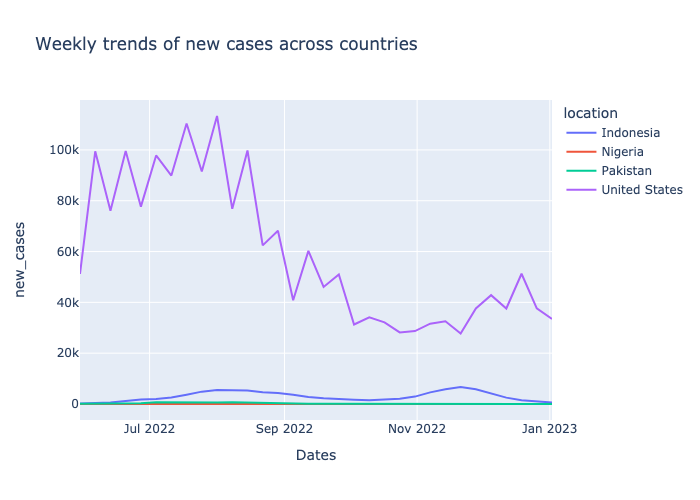

In [77]:
weekly_trends = px.line(world_data,x="Dates", y="new_cases", color="location",title = 'Weekly trends of new cases across countries')
#weekly_trends.show()
fig1 = weekly_trends.to_image(format="png")
Image(fig1)

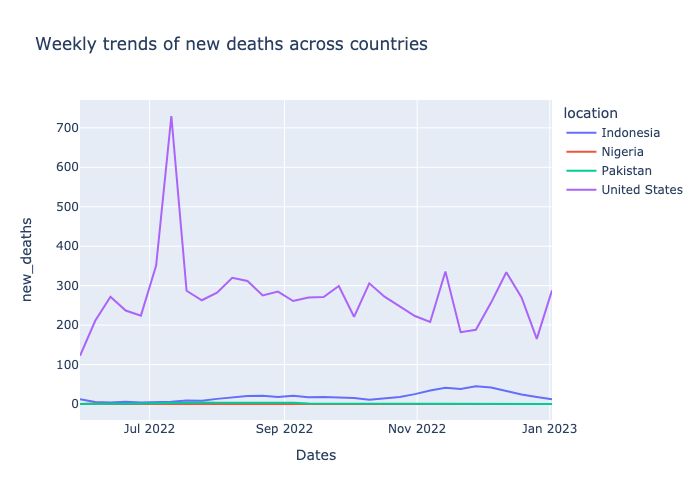

In [78]:
weekly_trends1 = px.line(world_data,x="Dates", y="new_deaths", color="location",title = 'Weekly trends of new deaths across countries')
#weekly_trends1.show()
fig2 = weekly_trends1.to_image(format="png")
Image(fig2)

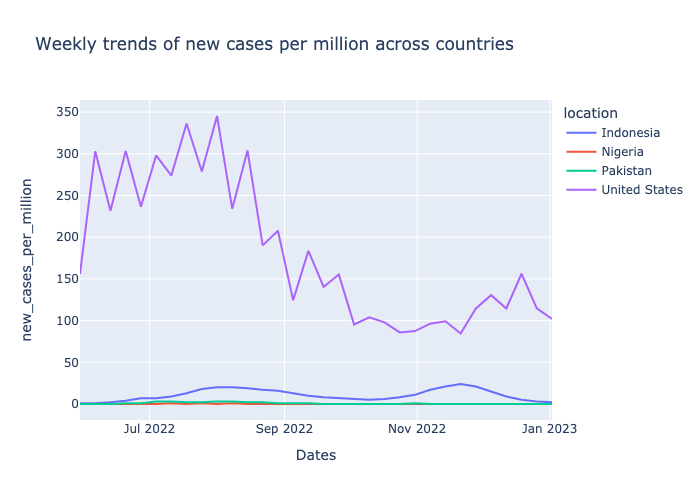

In [79]:
weekly_trends2 = px.line(world_data,x="Dates", y="new_cases_per_million", color="location",title = 'Weekly trends of new cases per million across countries')
#weekly_trends2.show()
fig3 = weekly_trends2.to_image(format="png")
Image(fig3)

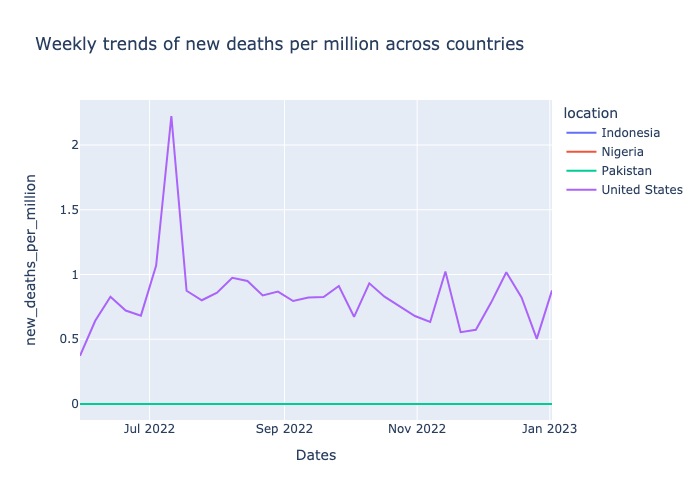

In [80]:
weekly_trends3 = px.line(world_data,x="Dates", y="new_deaths_per_million", color="location",title = 'Weekly trends of new deaths per million across countries')
#weekly_trends3.show()
fig4 = weekly_trends3.to_image(format="png")
Image(fig4)

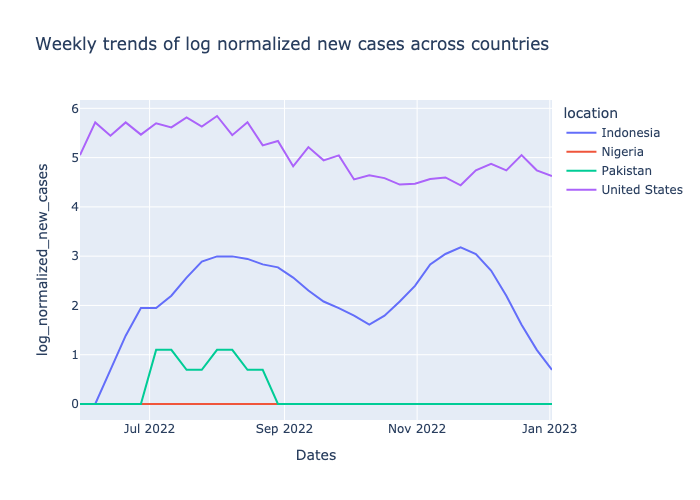

In [81]:
weekly_trends4 = px.line(world_data_log_normalized,x="Dates", y="log_normalized_new_cases", color="location",title = 'Weekly trends of log normalized new cases across countries')
#weekly_trends4.show()
fig5 = weekly_trends4.to_image(format="png")
Image(fig5)

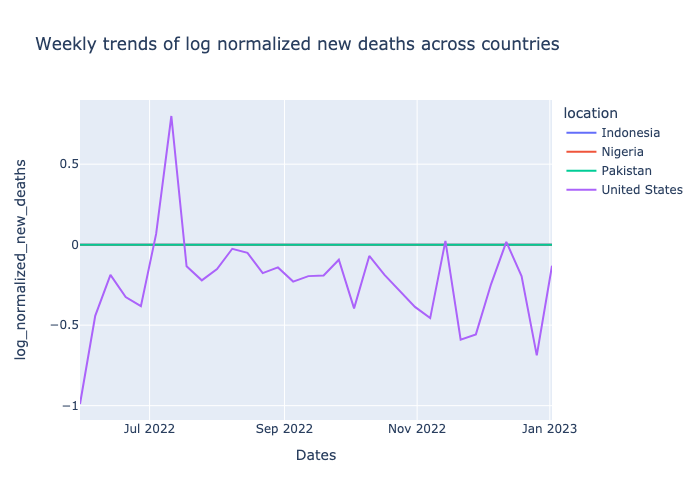

In [82]:
weekly_trends5 = px.line(world_data_log_normalized,x="Dates", y="log_normalized_new_deaths", color="location",title = 'Weekly trends of log normalized new deaths across countries')
#weekly_trends5.show()
fig6 = weekly_trends5.to_image(format="png")
Image(fig6)

### 5) Identify the peak weeks of the cases and deaths in US and other countries. Try to do background research to see what the reasoning for the peaks can be (holidays, vacations, travel, etc). Explain and relate the peaks with a description in the notebooks.

Peak weeks of new_cases across the different locations using sort_values and groupby functions

In [83]:
peak_new_cases_weeks = world_data_log_normalized.sort_values('new_cases',ascending = False).groupby(['location']).head(1)
peak_new_cases_weeks

,location,Dates,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,population,log_normalized_new_cases,log_normalized_new_deaths
105,United States,2022-08-01,113341,282,345.299673,0.859129,328239523.0,5.844413,-0.151837
25,Indonesia,2022-11-21,6680,38,24.000000,0.000000,275501344.0,3.178054,0.000000
69,Pakistan,2022-07-04,667,2,3.000000,0.000000,235824864.0,1.098612,0.000000
40,Nigeria,2022-07-25,190,0,1.000000,0.000000,218541216.0,0.000000,0.000000


Peak weeks of new_deaths across the different locations using sort_values and groupby functions

In [84]:
peak_new_deaths_weeks = world_data_log_normalized.sort_values('new_deaths',ascending = False).groupby(['location']).head(1)
peak_new_deaths_weeks

,location,Dates,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,population,log_normalized_new_cases,log_normalized_new_deaths
102,United States,2022-07-11,89890,730,273.854895,2.223986,328239523.0,5.612598,0.799301
26,Indonesia,2022-11-28,5828,45,21.000000,0.000000,275501344.0,3.044522,0.000000
75,Pakistan,2022-08-15,494,4,2.000000,0.000000,235824864.0,0.693147,0.000000
33,Nigeria,2022-06-06,17,1,0.000000,0.000000,218541216.0,0.000000,0.000000


### Background Research:

#### United States:

- There is in raise of covid 19 deaths by more than 50% during in the months of June, July and August 2022 which caused due to wide spread of omicron variant .

- Also vaccination process failed in the months of June, July and August2022 as omicron variant showed much impact in that period.

- Then there is a sudden drop in cases in the months of September, October 2022 due to second booster approved for the people aged 65+

- There is again raise in the cases in the months of November and December 2022 due to the thanksgiving and christmas holidays and also due to public gatherings.

#### Indonesia:

- Starting from April 2022 in person schools started which spiked the COVID-19 cases from June-August 2022.

- Indonesia has one of the highest numbers of covid19 cases in southeast Asia in the months of July 2022. Which makes up 13.8% of children under 18.

- Government of Indonesia has launched immunization in the month of September 2022 aiming to vaccinate 36.5 million children so there was drop in cases and deaths there after and again there is increase in the months of November and December.

#### Nigeria:

- Nigeria has very less death rate during all the three years of covid in which omicron did not impact much though the vaccination percentage people are less.

- Only 14% of people population has received covid vaccination, the anti-bodies are overwhelmingly.

#### Pakistan:

- The vaccination rates in pakistan are very less so there were some cases registered in the month of July and August 2022 due to the omicron variant. There were very less deaths registered in this period.

- Failure to follow public health measures such as wearing masks, physical distancing, and avoiding large gatherings are also one of the reasons for increase in cases in this country.





References:

- https://stackoverflow.com/questions/13114512/calculating-difference-between-two-rows-in-python-pandas

- https://stackoverflow.com/questions/45281297/group-by-week-in-pandas

- https://sparkbyexamples.com/pandas/pandas-select-dataframe-rows-based-on-column-values/

- https://plotly.com/python/line-charts/

- https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby


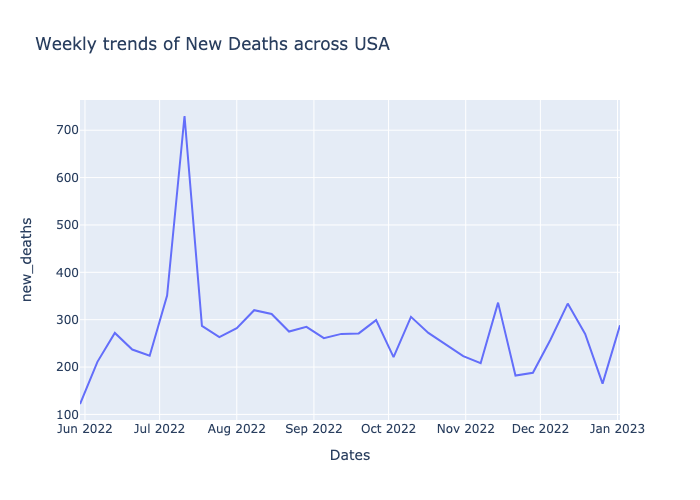

In [86]:
weekly_trends5 = px.line(usa_data_weekly,x="Dates", y="new_deaths",title = 'Weekly trends of New Deaths across USA')
#weekly_trends5.show()
fig6 = weekly_trends5.to_image(format="png")
Image(fig6)